In [192]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [190]:
train_path = 'train'
test_path = 'test'
valid_path = 'val'

In [193]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = train_path, target_size = (224, 224), classes = ['no','yes'], batch_size = 10) 
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = test_path, target_size = (224, 224), classes = ['no','yes'], batch_size = 10, shuffle = False) 
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = valid_path, target_size = (224, 224), classes = ['no','yes'], batch_size = 10) 

Found 2877 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [205]:
assert train_batches.num_classes == test_batches.num_classes == valid_batches.num_classes ==2

In [207]:
batch_data, batch_labels = next(train_batches)
print(batch_data.shape)

(10, 224, 224, 3)


In [185]:
def plot_Images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20 , 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

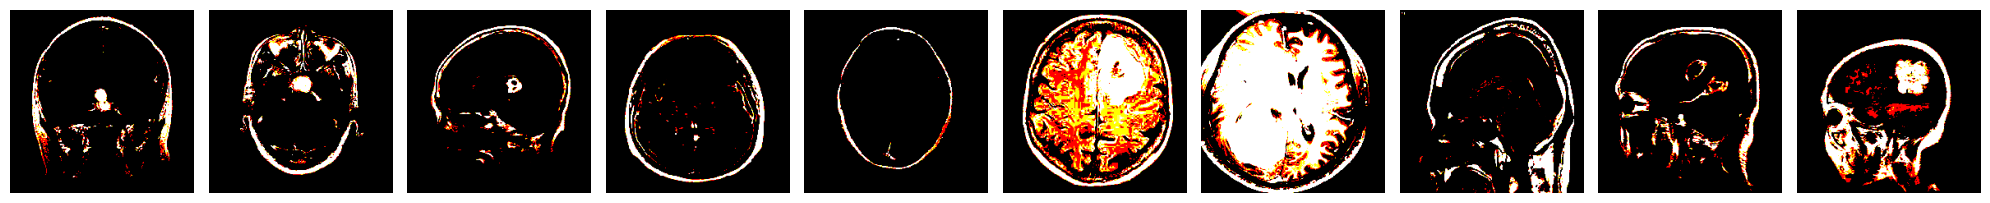

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [209]:
plot_Images(imgs)
print(labels)

In [208]:
imgs, labels = next(train_batches)

In [21]:
from tensorflow.keras import layers, models

In [138]:
import numpy as np

In [177]:
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [218]:
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu',padding = 'same',  input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides = 2),
    Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides = 2),
    Flatten(),
    Dense(2, activation='softmax')
])


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [219]:
model_cnn.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [220]:
model_cnn.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose =2)

Epoch 1/10
288/288 - 70s - 245ms/step - accuracy: 0.8825 - loss: 7.5508 - val_accuracy: 0.7000 - val_loss: 4.6588
Epoch 2/10
288/288 - 66s - 229ms/step - accuracy: 0.9659 - loss: 0.3746 - val_accuracy: 0.7667 - val_loss: 3.2912
Epoch 3/10
288/288 - 66s - 230ms/step - accuracy: 0.9864 - loss: 0.0786 - val_accuracy: 0.7143 - val_loss: 3.8705
Epoch 4/10
288/288 - 251s - 873ms/step - accuracy: 0.9930 - loss: 0.0264 - val_accuracy: 0.6905 - val_loss: 4.7028
Epoch 5/10
288/288 - 65s - 227ms/step - accuracy: 0.9979 - loss: 0.0119 - val_accuracy: 0.7476 - val_loss: 2.7731
Epoch 6/10
288/288 - 65s - 226ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.6952 - val_loss: 3.4710
Epoch 7/10
288/288 - 64s - 222ms/step - accuracy: 0.9930 - loss: 0.0266 - val_accuracy: 0.7143 - val_loss: 4.9438
Epoch 8/10
288/288 - 64s - 223ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.7190 - val_loss: 4.5807
Epoch 9/10
288/288 - 64s - 221ms/step - accuracy: 0.9965 - loss: 0.0149 - val_accuracy:

In [221]:

predictions = model_cnn.predict(x = test_batches, verbose = 0)

In [222]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [223]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

In [224]:
cm

array([[116,   7],
       [  9, 124]], dtype=int64)

In [130]:
img_path = 'yes.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Resize the image to match the input size of your model
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (rescale to [0, 1])
img_array = img_array / 255.0

# Make predictions using your model
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Interpret the predictions
# For example, if you have a binary classification model
print(predicted_class_index )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0


In [230]:
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = test_batches.classes
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9375
